In [41]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt

In [46]:
jnj = yf.Ticker("JNJ")
jnj.dividends

Date
1962-02-13 00:00:00-05:00    0.000579
1962-05-22 00:00:00-04:00    0.000579
1962-08-21 00:00:00-04:00    0.000579
1962-11-21 00:00:00-05:00    0.000579
1963-02-19 00:00:00-05:00    0.000810
                               ...   
2022-05-23 00:00:00-04:00    1.130000
2022-08-22 00:00:00-04:00    1.130000
2022-11-21 00:00:00-05:00    1.130000
2023-02-17 00:00:00-05:00    1.130000
2023-05-22 00:00:00-04:00    1.190000
Name: Dividends, Length: 246, dtype: float64

In [52]:
df = pd.DataFrame(jnj.dividends)
df.reset_index(inplace=True)
df['Date'] = df['Date'].dt.date
df.set_index('Date', inplace=True)
df

,Dividends
Date,
1962-02-13,0.000579
1962-05-22,0.000579
1962-08-21,0.000579
1962-11-21,0.000579
1963-02-19,0.000810
...,...
2022-05-23,1.130000
2022-08-22,1.130000
2022-11-21,1.130000


# Parse Years to Calculate Annual Dividends

In [57]:
years = {}

for date in df.index:
    year = date.year
    if year in years:
        years[year] += df.loc[date, 'Dividends']
    else:
        years[year] = df.loc[date, 'Dividends']

# Historical Payout Visualization

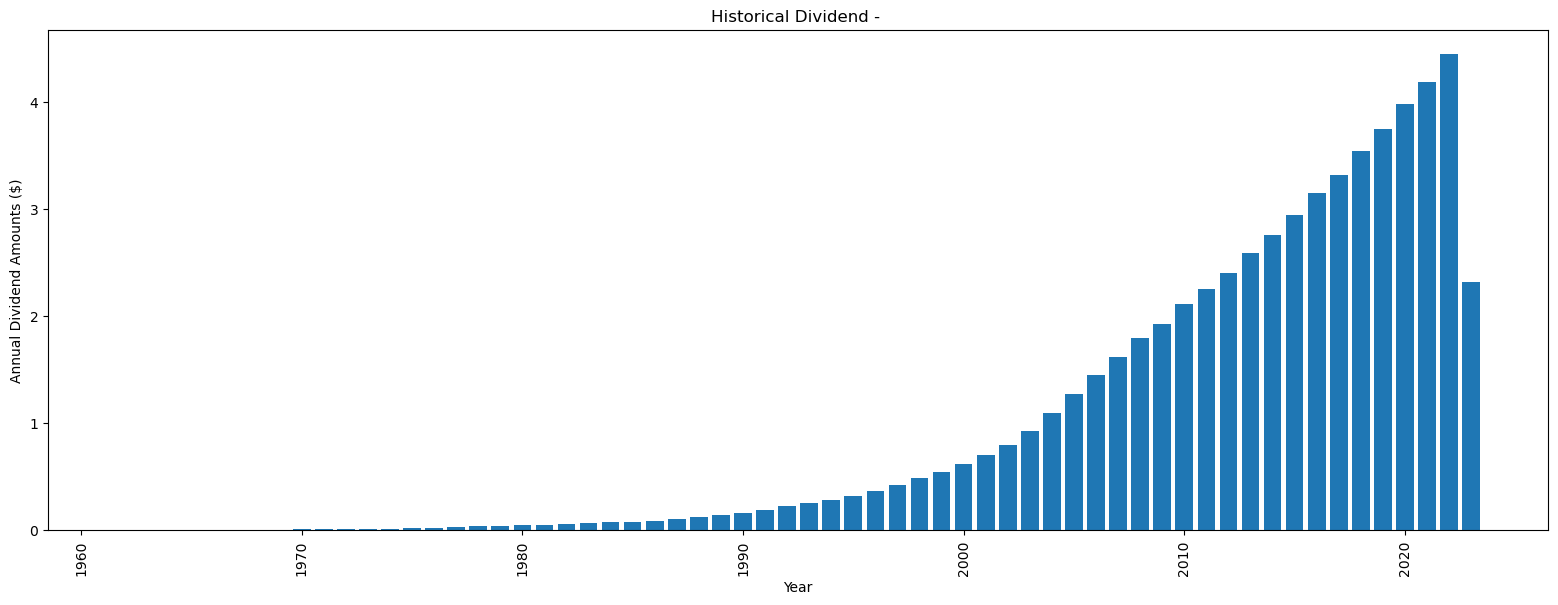

In [59]:
x_value = [i for i in years.keys()]
y_value = [i for i in years.values()]
fig = plt.figure(figsize=(15, 5))
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(x_value, y_value)
plt.title('Historical Dividend - ')
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.ylabel('Annual Dividend Amounts ($)')
plt.show()